# Border Generation

For TEM (Transmission Electron Microscope) and SEM (Scanning Electron Microscope) Images.

In [360]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from pathlib import Path
from PIL import Image

In [361]:
# Constants
IMAGES_DIR_PATH = "./TEM_NW/20250709-TEM-Yutichai/E8-NW/" # Raw images directory
OUTPUT_DIR_PATH = "./outputs/border_generation/"    # Saved images directory
INPUT_FILE_EXTENSION = "tif"   # Use '*' to include all file extensions
OUTPUT_FILE_EXTENSION = "tif"  # File extension for processed images

### Exploratory Data Analysis

Conduct EDA to examine the properties of the samples.

In [362]:
# Store all images in the direcotry in "images" list
images = []
file_names = []

for file in glob.glob(IMAGES_DIR_PATH + "*." + INPUT_FILE_EXTENSION):
        file_name = Path(file).stem # Extract the original file name (extension excluded)
        images.append(cv2.imread(IMAGES_DIR_PATH + file_name + '.' + INPUT_FILE_EXTENSION, cv2.IMREAD_COLOR_BGR))   # Read and store all images in BGR format
        file_names.append(file_name)

In [363]:
# Check for imparity
print(len(images))
print(len(file_names))

126
126


In [364]:
# Displaying sample images
def display_images(images):
    print("Displaying images in: " + IMAGES_DIR_PATH)

    num_images_in_figure = 9    # Number of images in the figure
    count = 1   # Image counter

    plt.figure(figsize=(10, 10))    # Figure size

    # Plotting all images
    for image in images:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if (count > num_images_in_figure):
            break

        plt.subplot(3, 3, count)
        plt.imshow(image)  
        plt.axis('off') 
        plt.title(file_name, fontsize=9)

        count += 1

    plt.tight_layout()
    plt.show()

Displaying images in: ./TEM_NW/20250709-TEM-Yutichai/E8-NW/


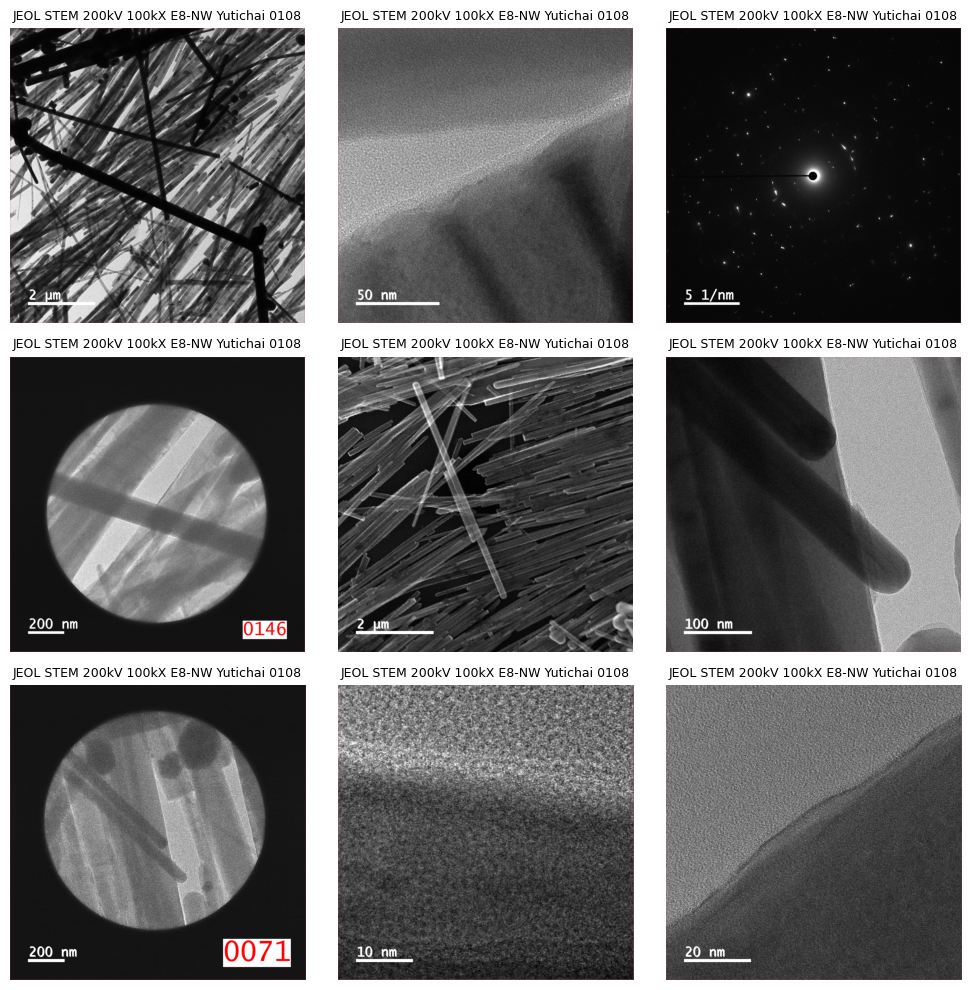

In [365]:
display_images(images)

In [366]:
# Function for plotting greyscale pixels frequency histogram
def plot_pixel_frequency_histogram(images, num_of_histogram=9):
    i = 0
    pixels_intensity = []

    for image in images:
        if i >= num_of_histogram:
            break

        # Convert BGR or other multi-channel image to grayscale
        if len(image.shape) > 2:
            grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            grey_image = image

        # Display the orignial image
        plt.imshow(image)  
        plt.axis('off') 
        plt.title(file_name, fontsize=9)

        # Plot the histogram
        plt.figure()
        plt.title("Grayscale Frequency Histogram")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.hist(grey_image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
        plt.show()

        # Find the peaks (dx/dy = 0)
        hist_data, bins = np.histogram(grey_image.ravel(), bins=256, range=[0, 256])

        pixels_intensity = hist_data.tolist()

        for j in range(len(pixels_intensity)):
            if (j == 0 and pixels_intensity[j] > pixels_intensity[j+1]):
                print("Pixel ", j, " , Intensity: ", pixels_intensity[j])
            elif (j == 255 and pixels_intensity[j] > pixels_intensity[j-1]):
                print("Pixel ", j, " , Intensity: ", pixels_intensity[j])
            elif (pixels_intensity[j] > pixels_intensity[j-1] and pixels_intensity[j] > pixels_intensity[j+1]):
                print("Pixel ", j, " , Intensity: ", pixels_intensity[j])

        i+=1


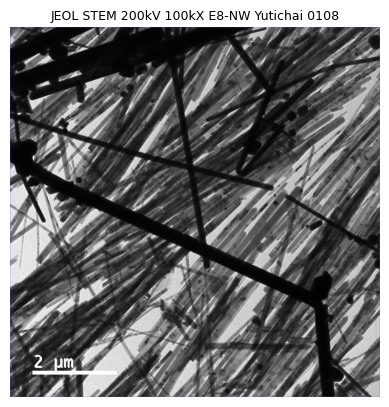

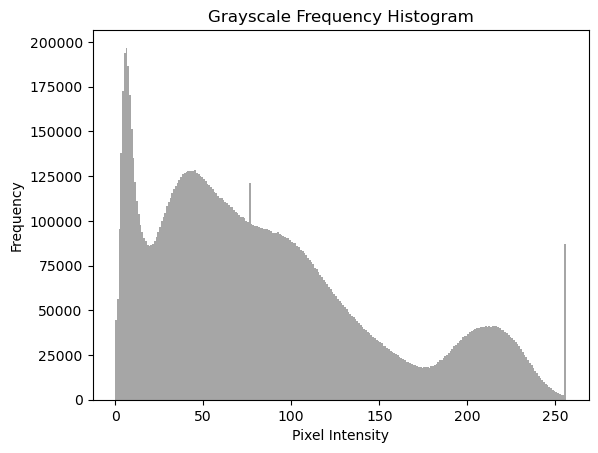

Pixel  6  , Intensity:  196767
Pixel  42  , Intensity:  128015
Pixel  45  , Intensity:  128467
Pixel  76  , Intensity:  120945
Pixel  90  , Intensity:  93398
Pixel  92  , Intensity:  93479
Pixel  176  , Intensity:  18360
Pixel  210  , Intensity:  41010
Pixel  212  , Intensity:  41253
Pixel  214  , Intensity:  41068
Pixel  255  , Intensity:  87169


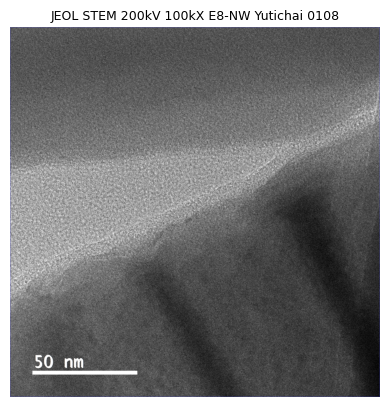

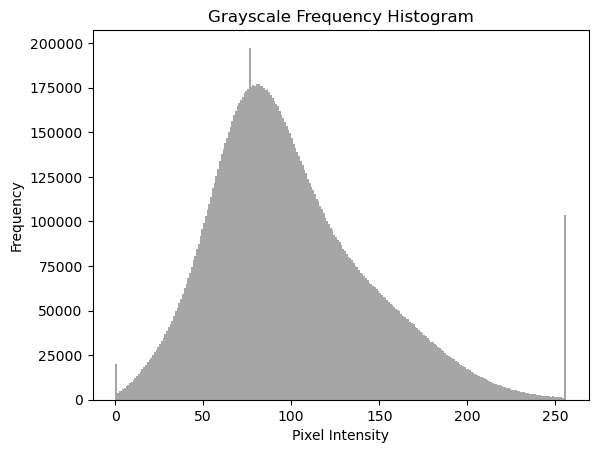

Pixel  0  , Intensity:  19921
Pixel  76  , Intensity:  197420
Pixel  78  , Intensity:  176523
Pixel  80  , Intensity:  177213
Pixel  86  , Intensity:  174253
Pixel  246  , Intensity:  1968
Pixel  248  , Intensity:  1817
Pixel  252  , Intensity:  1443
Pixel  255  , Intensity:  103691


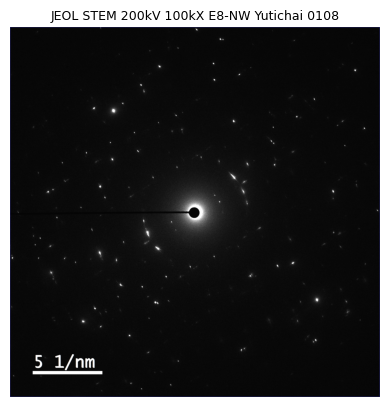

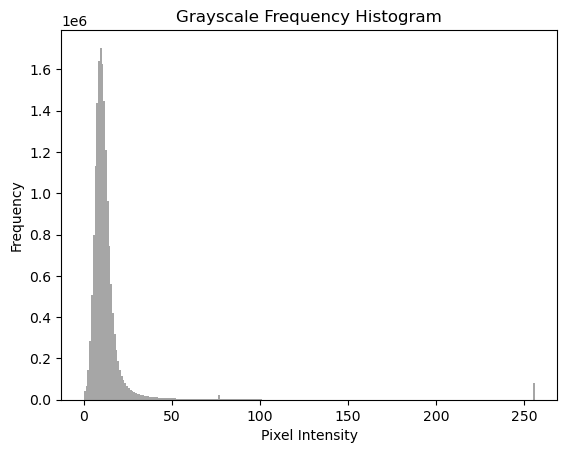

Pixel  9  , Intensity:  1704685
Pixel  70  , Intensity:  2710
Pixel  76  , Intensity:  24019
Pixel  81  , Intensity:  1887
Pixel  84  , Intensity:  1684
Pixel  90  , Intensity:  1397
Pixel  96  , Intensity:  1177
Pixel  98  , Intensity:  1170
Pixel  103  , Intensity:  998
Pixel  108  , Intensity:  898
Pixel  110  , Intensity:  867
Pixel  112  , Intensity:  857
Pixel  114  , Intensity:  803
Pixel  116  , Intensity:  762
Pixel  118  , Intensity:  737
Pixel  123  , Intensity:  686
Pixel  125  , Intensity:  672
Pixel  128  , Intensity:  760
Pixel  133  , Intensity:  574
Pixel  137  , Intensity:  535
Pixel  141  , Intensity:  495
Pixel  144  , Intensity:  493
Pixel  147  , Intensity:  460
Pixel  150  , Intensity:  444
Pixel  153  , Intensity:  403
Pixel  158  , Intensity:  460
Pixel  163  , Intensity:  354
Pixel  165  , Intensity:  341
Pixel  168  , Intensity:  355
Pixel  172  , Intensity:  294
Pixel  175  , Intensity:  318
Pixel  178  , Intensity:  280
Pixel  180  , Intensity:  272
Pixel  

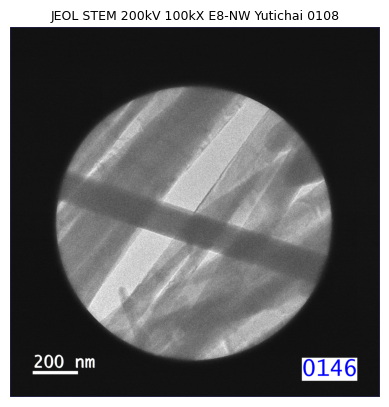

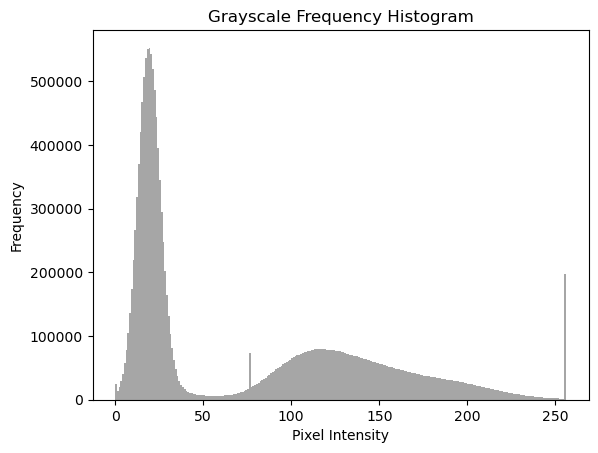

Pixel  0  , Intensity:  24727
Pixel  19  , Intensity:  552977
Pixel  57  , Intensity:  6464
Pixel  76  , Intensity:  73779
Pixel  116  , Intensity:  79441
Pixel  119  , Intensity:  79635
Pixel  121  , Intensity:  78814
Pixel  124  , Intensity:  77646
Pixel  181  , Intensity:  35449
Pixel  247  , Intensity:  3060
Pixel  251  , Intensity:  2291
Pixel  255  , Intensity:  198070


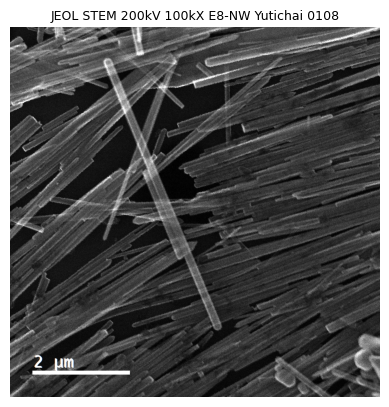

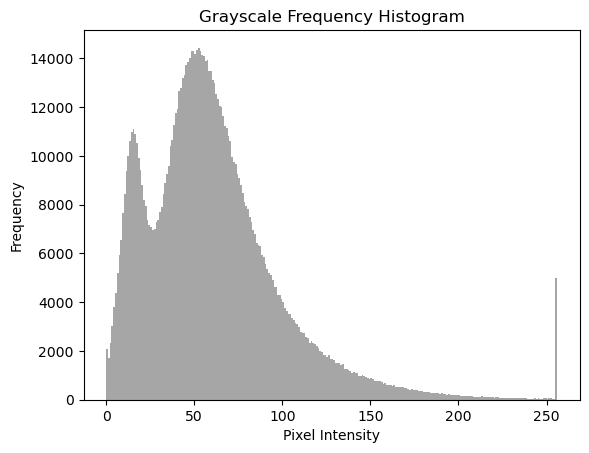

Pixel  0  , Intensity:  2084
Pixel  15  , Intensity:  11084
Pixel  49  , Intensity:  14322
Pixel  52  , Intensity:  14437
Pixel  57  , Intensity:  13933
Pixel  116  , Intensity:  2399
Pixel  124  , Intensity:  1850
Pixel  126  , Intensity:  1816
Pixel  134  , Intensity:  1452
Pixel  140  , Intensity:  1157
Pixel  145  , Intensity:  999
Pixel  150  , Intensity:  871
Pixel  153  , Intensity:  774
Pixel  155  , Intensity:  762
Pixel  158  , Intensity:  682
Pixel  163  , Intensity:  604
Pixel  167  , Intensity:  521
Pixel  170  , Intensity:  484
Pixel  173  , Intensity:  444
Pixel  175  , Intensity:  410
Pixel  178  , Intensity:  365
Pixel  186  , Intensity:  285
Pixel  190  , Intensity:  280
Pixel  192  , Intensity:  224
Pixel  194  , Intensity:  218
Pixel  196  , Intensity:  213
Pixel  199  , Intensity:  185
Pixel  203  , Intensity:  165
Pixel  207  , Intensity:  145
Pixel  211  , Intensity:  114
Pixel  213  , Intensity:  142
Pixel  215  , Intensity:  123
Pixel  217  , Intensity:  118
Pi

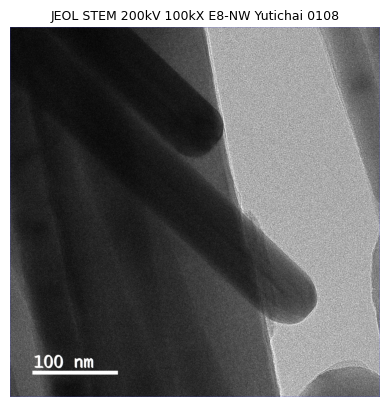

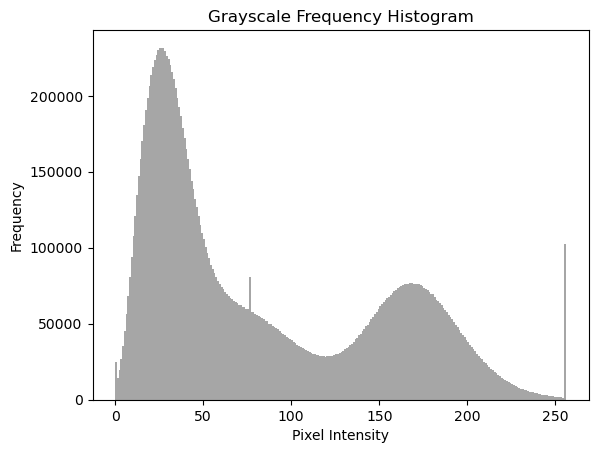

Pixel  0  , Intensity:  24907
Pixel  26  , Intensity:  231636
Pixel  71  , Intensity:  62298
Pixel  76  , Intensity:  80921
Pixel  117  , Intensity:  28668
Pixel  167  , Intensity:  76520
Pixel  172  , Intensity:  76121
Pixel  251  , Intensity:  1837
Pixel  255  , Intensity:  102634


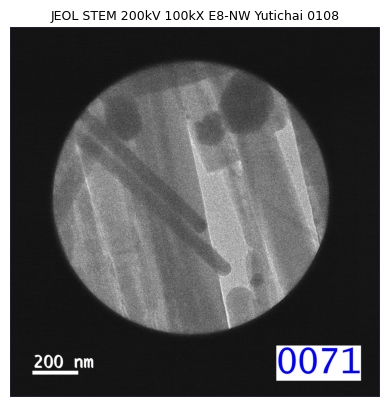

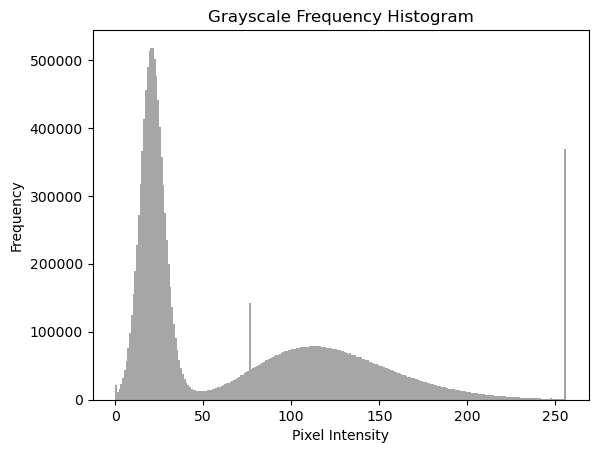

Pixel  0  , Intensity:  21869
Pixel  20  , Intensity:  517870
Pixel  76  , Intensity:  141574
Pixel  107  , Intensity:  78219
Pixel  110  , Intensity:  79565
Pixel  113  , Intensity:  78751
Pixel  116  , Intensity:  78595
Pixel  121  , Intensity:  76377
Pixel  133  , Intensity:  68032
Pixel  221  , Intensity:  4989
Pixel  227  , Intensity:  3625
Pixel  234  , Intensity:  2970
Pixel  237  , Intensity:  2238
Pixel  245  , Intensity:  1669
Pixel  247  , Intensity:  1869
Pixel  251  , Intensity:  1587
Pixel  255  , Intensity:  368895


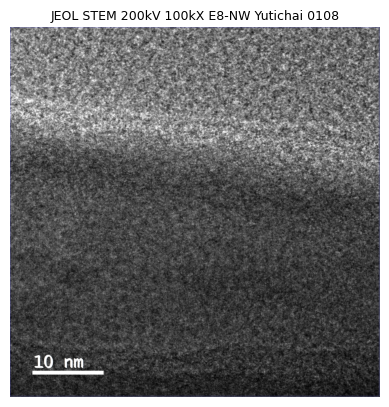

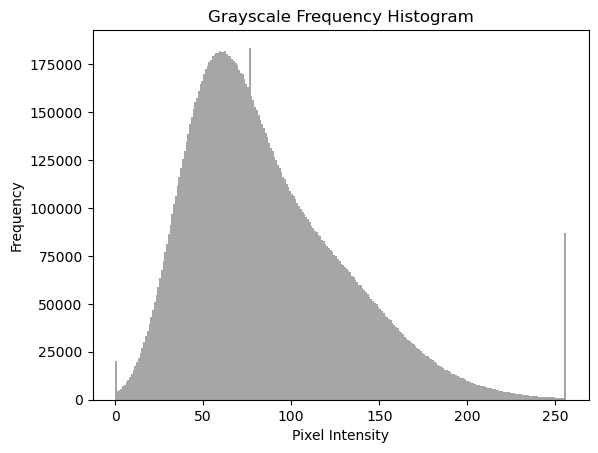

Pixel  0  , Intensity:  20015
Pixel  59  , Intensity:  182035
Pixel  62  , Intensity:  181818
Pixel  76  , Intensity:  183587
Pixel  236  , Intensity:  2131
Pixel  241  , Intensity:  1668
Pixel  247  , Intensity:  1339
Pixel  249  , Intensity:  1284
Pixel  251  , Intensity:  1114
Pixel  255  , Intensity:  86823


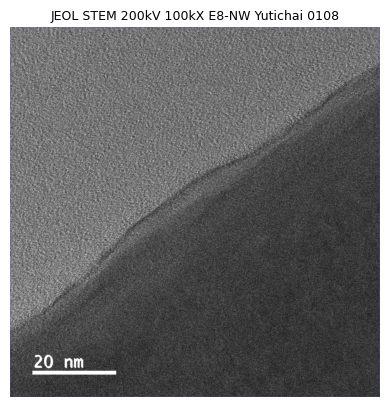

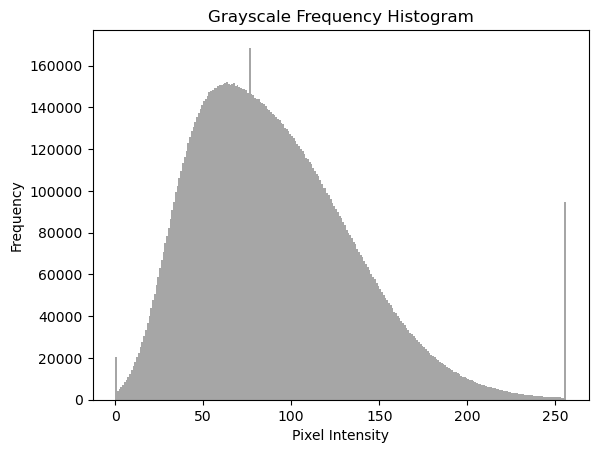

Pixel  0  , Intensity:  20485
Pixel  56  , Intensity:  149443
Pixel  63  , Intensity:  152226
Pixel  67  , Intensity:  151747
Pixel  69  , Intensity:  150720
Pixel  76  , Intensity:  168573
Pixel  236  , Intensity:  2164
Pixel  238  , Intensity:  2007
Pixel  244  , Intensity:  1427
Pixel  252  , Intensity:  1112
Pixel  255  , Intensity:  94559


In [367]:
plot_pixel_frequency_histogram(images, num_of_histogram=9)

### Data Preparation

Adjusting constrast, brightness, etc to facilitate border marking process.

In [368]:
# Image Properties Modification Function

# Note: The order of processing layers in this function matters

def modify_image(image, alpha=1.5, beta=2.0, guassian_kernel_size=5, diameter=9, sigmaColor=75, sigmaSpace=75, median_blur_kernel_size=9):
    processed_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    processed_image = cv2.GaussianBlur(processed_image, (guassian_kernel_size, guassian_kernel_size), 0)
    processed_image = cv2.bilateralFilter(processed_image, diameter, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)
    processed_image = cv2.medianBlur(processed_image, median_blur_kernel_size)
    processed_image = cv2.bilateralFilter(processed_image, diameter, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)
    processed_image = cv2.medianBlur(processed_image, median_blur_kernel_size)
    processed_image = cv2.medianBlur(processed_image, median_blur_kernel_size)

    return processed_image

In [369]:
# Modify image properties
modified_images = []

for image in images:
    modified_images.append(modify_image(image, alpha=2.05, beta=2.5, guassian_kernel_size=11, diameter=12, sigmaColor=75, sigmaSpace=25, median_blur_kernel_size=17))

Displaying images in: ./TEM_NW/20250709-TEM-Yutichai/E8-NW/


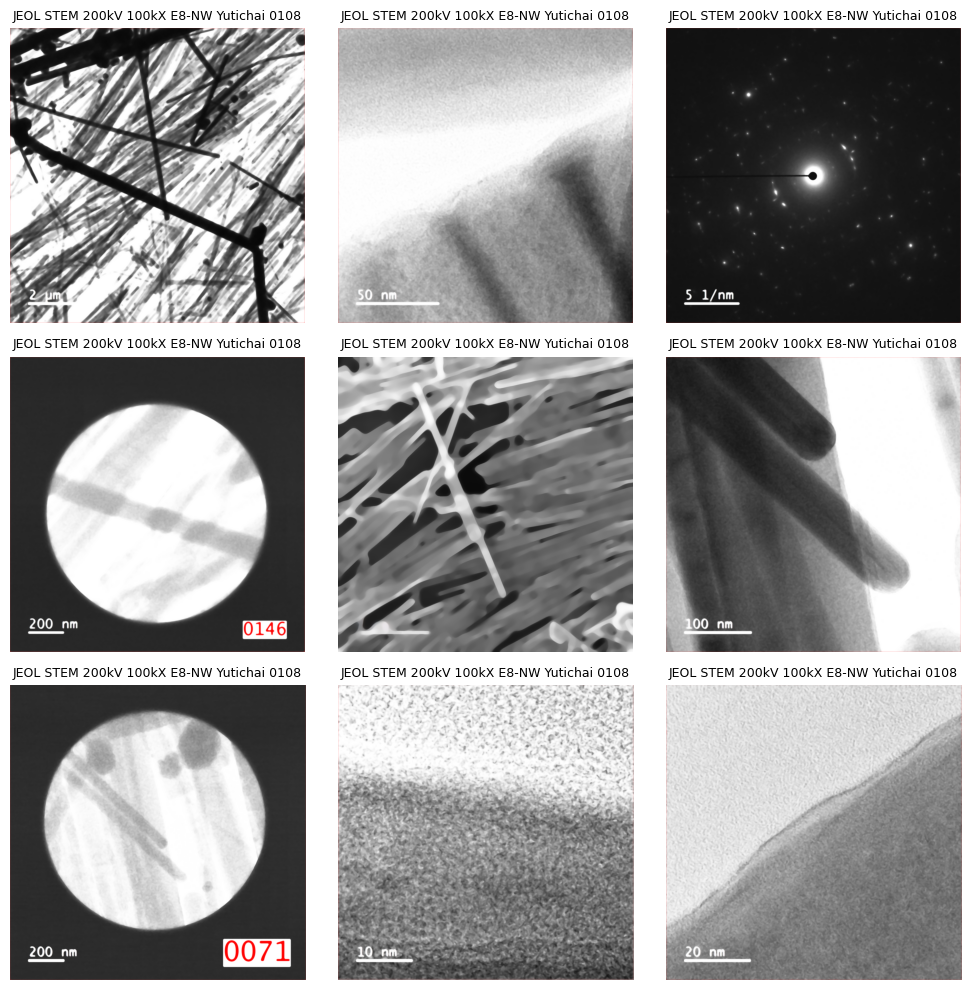

In [370]:
display_images(modified_images)

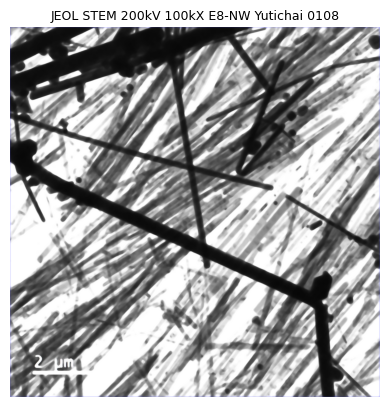

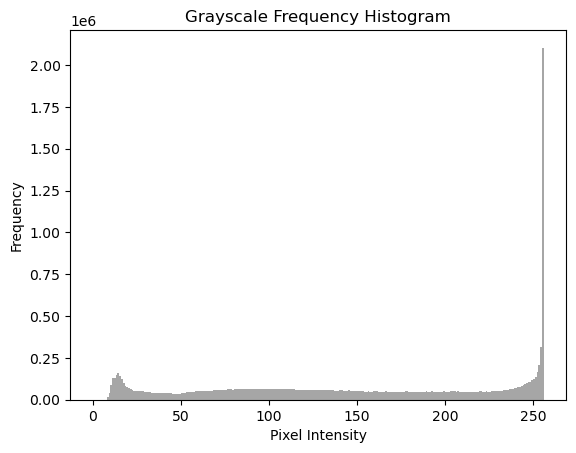

Pixel  14  , Intensity:  157574
Pixel  27  , Intensity:  50528
Pixel  31  , Intensity:  47566
Pixel  38  , Intensity:  38795
Pixel  42  , Intensity:  40514
Pixel  47  , Intensity:  34646
Pixel  54  , Intensity:  49000
Pixel  59  , Intensity:  51076
Pixel  62  , Intensity:  50609
Pixel  64  , Intensity:  50958
Pixel  69  , Intensity:  56557
Pixel  73  , Intensity:  59996
Pixel  76  , Intensity:  63536
Pixel  80  , Intensity:  62966
Pixel  84  , Intensity:  64064
Pixel  88  , Intensity:  64693
Pixel  90  , Intensity:  63811
Pixel  93  , Intensity:  64548
Pixel  97  , Intensity:  63881
Pixel  100  , Intensity:  63166
Pixel  102  , Intensity:  63883
Pixel  106  , Intensity:  66874
Pixel  110  , Intensity:  62564
Pixel  112  , Intensity:  63154
Pixel  117  , Intensity:  58119
Pixel  124  , Intensity:  57547
Pixel  131  , Intensity:  56550
Pixel  135  , Intensity:  60009
Pixel  140  , Intensity:  56941
Pixel  145  , Intensity:  55967
Pixel  148  , Intensity:  53037
Pixel  156  , Intensity:  

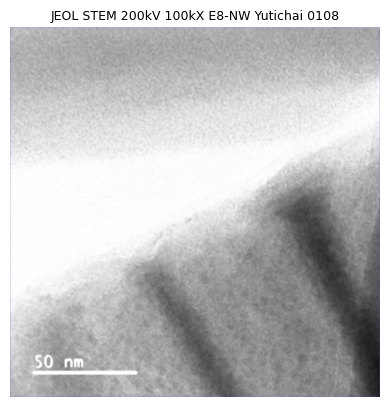

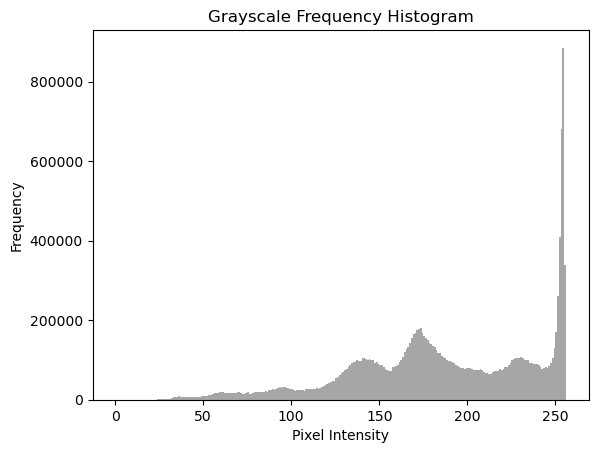

Pixel  21  , Intensity:  320
Pixel  24  , Intensity:  1496
Pixel  30  , Intensity:  2952
Pixel  36  , Intensity:  9289
Pixel  38  , Intensity:  7519
Pixel  40  , Intensity:  7779
Pixel  46  , Intensity:  7856
Pixel  50  , Intensity:  8729
Pixel  57  , Intensity:  18097
Pixel  59  , Intensity:  19561
Pixel  61  , Intensity:  19033
Pixel  65  , Intensity:  18053
Pixel  69  , Intensity:  20106
Pixel  75  , Intensity:  18324
Pixel  80  , Intensity:  18539
Pixel  85  , Intensity:  21084
Pixel  89  , Intensity:  26650
Pixel  93  , Intensity:  31412
Pixel  96  , Intensity:  33117
Pixel  103  , Intensity:  24681
Pixel  105  , Intensity:  24350
Pixel  110  , Intensity:  28113
Pixel  114  , Intensity:  29056
Pixel  137  , Intensity:  98864
Pixel  141  , Intensity:  105724
Pixel  144  , Intensity:  101459
Pixel  148  , Intensity:  94052
Pixel  151  , Intensity:  87581
Pixel  157  , Intensity:  82750
Pixel  173  , Intensity:  179894
Pixel  190  , Intensity:  96296
Pixel  201  , Intensity:  79627
P

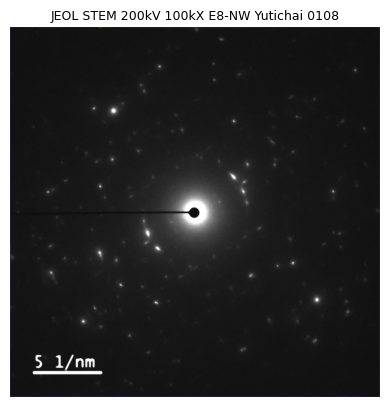

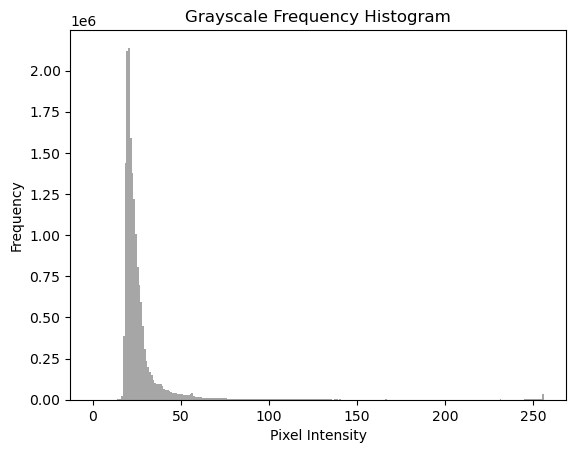

Pixel  20  , Intensity:  2138561
Pixel  38  , Intensity:  96042
Pixel  46  , Intensity:  43623
Pixel  49  , Intensity:  35530
Pixel  53  , Intensity:  31630
Pixel  56  , Intensity:  39508
Pixel  74  , Intensity:  8903
Pixel  81  , Intensity:  5992
Pixel  88  , Intensity:  5006
Pixel  90  , Intensity:  4838
Pixel  93  , Intensity:  4229
Pixel  97  , Intensity:  3497
Pixel  99  , Intensity:  3226
Pixel  105  , Intensity:  2992
Pixel  108  , Intensity:  3436
Pixel  116  , Intensity:  2149
Pixel  124  , Intensity:  1884
Pixel  126  , Intensity:  1686
Pixel  129  , Intensity:  1548
Pixel  132  , Intensity:  1516
Pixel  138  , Intensity:  1363
Pixel  140  , Intensity:  1364
Pixel  143  , Intensity:  1348
Pixel  145  , Intensity:  1249
Pixel  150  , Intensity:  1104
Pixel  152  , Intensity:  989
Pixel  154  , Intensity:  1004
Pixel  156  , Intensity:  1069
Pixel  160  , Intensity:  972
Pixel  166  , Intensity:  1902
Pixel  170  , Intensity:  803
Pixel  172  , Intensity:  751
Pixel  174  , Int

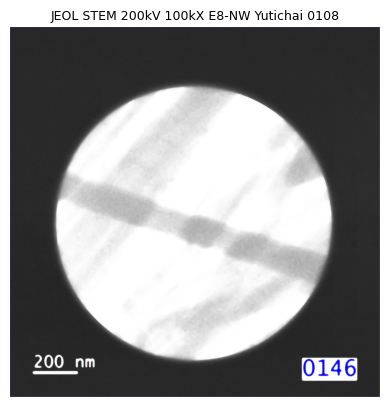

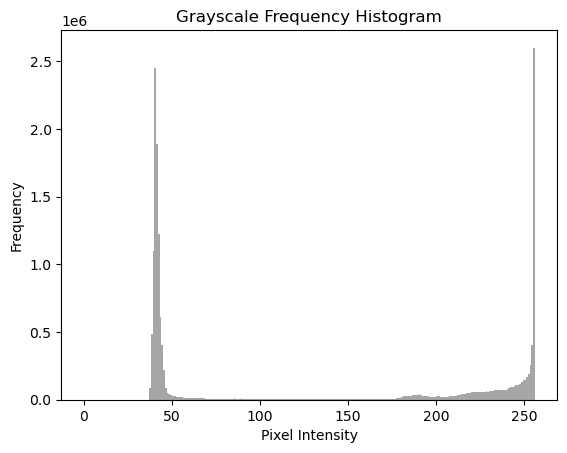

Pixel  40  , Intensity:  2455257
Pixel  60  , Intensity:  15712
Pixel  66  , Intensity:  15419
Pixel  78  , Intensity:  7745
Pixel  80  , Intensity:  8440
Pixel  83  , Intensity:  8943
Pixel  85  , Intensity:  9864
Pixel  89  , Intensity:  10583
Pixel  93  , Intensity:  8761
Pixel  99  , Intensity:  3705
Pixel  103  , Intensity:  3559
Pixel  105  , Intensity:  3347
Pixel  107  , Intensity:  3282
Pixel  109  , Intensity:  3149
Pixel  112  , Intensity:  3023
Pixel  114  , Intensity:  2954
Pixel  116  , Intensity:  2850
Pixel  119  , Intensity:  3468
Pixel  127  , Intensity:  2527
Pixel  130  , Intensity:  2340
Pixel  134  , Intensity:  2529
Pixel  137  , Intensity:  2255
Pixel  141  , Intensity:  2142
Pixel  144  , Intensity:  2053
Pixel  147  , Intensity:  2113
Pixel  155  , Intensity:  1982
Pixel  160  , Intensity:  2194
Pixel  164  , Intensity:  2293
Pixel  166  , Intensity:  2438
Pixel  168  , Intensity:  2354
Pixel  183  , Intensity:  28486
Pixel  186  , Intensity:  34385
Pixel  190

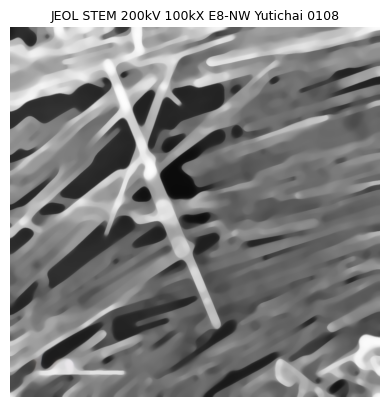

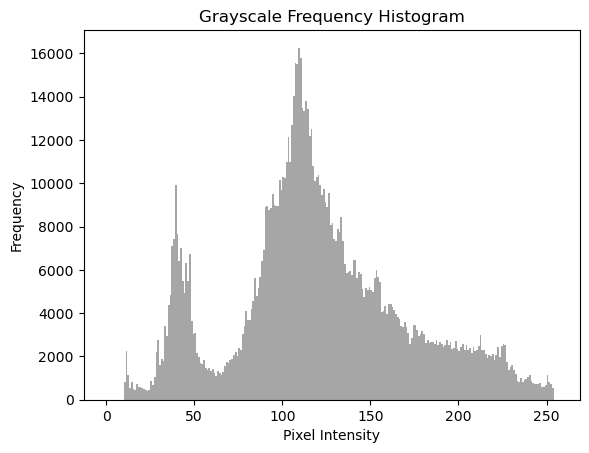

Pixel  11  , Intensity:  2268
Pixel  14  , Intensity:  827
Pixel  17  , Intensity:  727
Pixel  25  , Intensity:  886
Pixel  29  , Intensity:  2740
Pixel  31  , Intensity:  1881
Pixel  33  , Intensity:  3398
Pixel  39  , Intensity:  9944
Pixel  42  , Intensity:  7020
Pixel  45  , Intensity:  6311
Pixel  47  , Intensity:  6719
Pixel  50  , Intensity:  3078
Pixel  55  , Intensity:  1829
Pixel  58  , Intensity:  1463
Pixel  60  , Intensity:  1398
Pixel  63  , Intensity:  1331
Pixel  68  , Intensity:  1721
Pixel  73  , Intensity:  2182
Pixel  75  , Intensity:  2395
Pixel  79  , Intensity:  4088
Pixel  84  , Intensity:  5627
Pixel  91  , Intensity:  8936
Pixel  94  , Intensity:  9508
Pixel  98  , Intensity:  10147
Pixel  100  , Intensity:  10296
Pixel  103  , Intensity:  12121
Pixel  107  , Intensity:  15558
Pixel  109  , Intensity:  16264
Pixel  113  , Intensity:  13792
Pixel  116  , Intensity:  12511
Pixel  120  , Intensity:  10382
Pixel  123  , Intensity:  9759
Pixel  126  , Intensity:  9

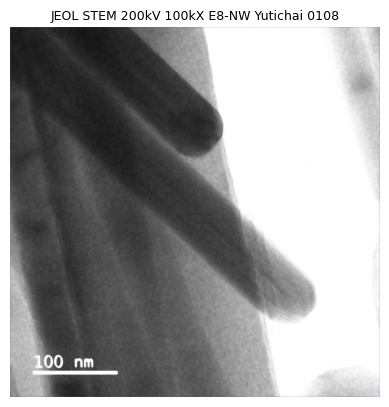

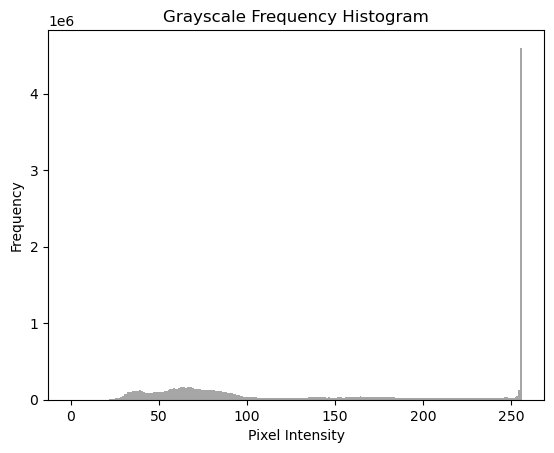

Pixel  36  , Intensity:  116872
Pixel  39  , Intensity:  121581
Pixel  49  , Intensity:  104290
Pixel  51  , Intensity:  103783
Pixel  58  , Intensity:  147444
Pixel  63  , Intensity:  166204
Pixel  66  , Intensity:  161867
Pixel  68  , Intensity:  160576
Pixel  75  , Intensity:  128534
Pixel  79  , Intensity:  128200
Pixel  103  , Intensity:  30467
Pixel  112  , Intensity:  25769
Pixel  118  , Intensity:  21159
Pixel  123  , Intensity:  25117
Pixel  126  , Intensity:  25194
Pixel  129  , Intensity:  25587
Pixel  132  , Intensity:  26929
Pixel  135  , Intensity:  30406
Pixel  142  , Intensity:  32245
Pixel  146  , Intensity:  29697
Pixel  148  , Intensity:  27109
Pixel  153  , Intensity:  31569
Pixel  157  , Intensity:  33306
Pixel  164  , Intensity:  42545
Pixel  172  , Intensity:  36066
Pixel  174  , Intensity:  37116
Pixel  178  , Intensity:  35511
Pixel  180  , Intensity:  35762
Pixel  183  , Intensity:  33510
Pixel  188  , Intensity:  27221
Pixel  197  , Intensity:  19123
Pixel  2

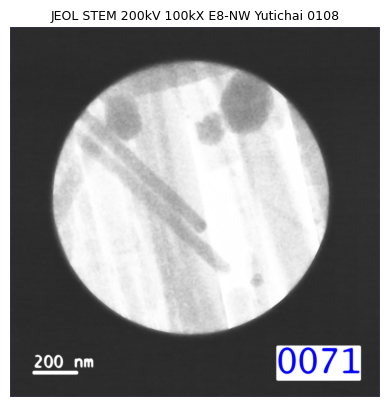

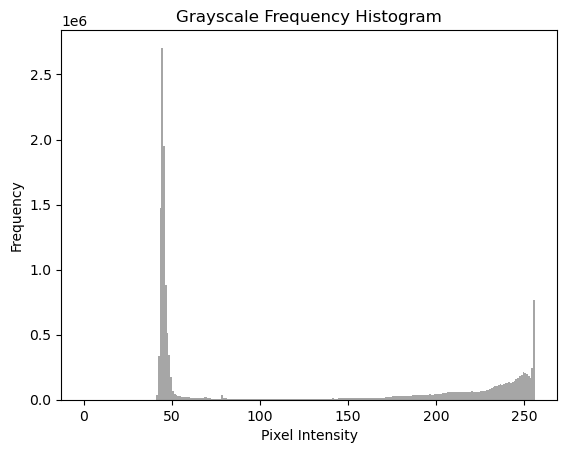

Pixel  44  , Intensity:  2705615
Pixel  63  , Intensity:  15056
Pixel  68  , Intensity:  20549
Pixel  78  , Intensity:  33553
Pixel  83  , Intensity:  8611
Pixel  93  , Intensity:  4479
Pixel  104  , Intensity:  3118
Pixel  110  , Intensity:  2757
Pixel  114  , Intensity:  2627
Pixel  117  , Intensity:  2706
Pixel  121  , Intensity:  3313
Pixel  127  , Intensity:  2576
Pixel  132  , Intensity:  3334
Pixel  134  , Intensity:  4357
Pixel  139  , Intensity:  8082
Pixel  141  , Intensity:  9754
Pixel  149  , Intensity:  14271
Pixel  151  , Intensity:  15934
Pixel  156  , Intensity:  14164
Pixel  162  , Intensity:  13055
Pixel  164  , Intensity:  13236
Pixel  166  , Intensity:  13514
Pixel  168  , Intensity:  14509
Pixel  172  , Intensity:  20348
Pixel  176  , Intensity:  28091
Pixel  178  , Intensity:  28347
Pixel  187  , Intensity:  34299
Pixel  189  , Intensity:  36349
Pixel  193  , Intensity:  39338
Pixel  196  , Intensity:  41730
Pixel  200  , Intensity:  45465
Pixel  206  , Intensity:

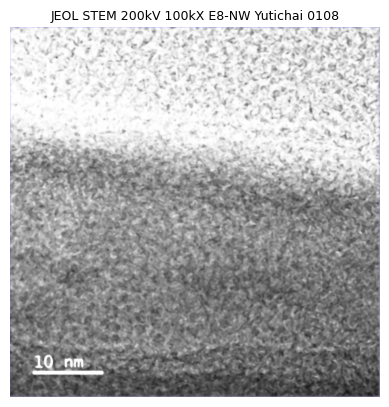

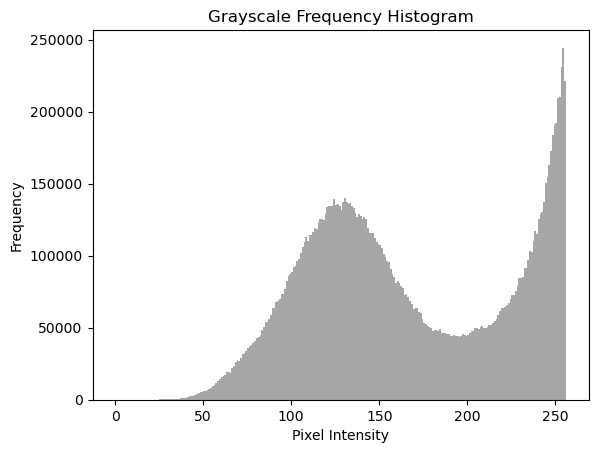

Pixel  20  , Intensity:  73
Pixel  26  , Intensity:  190
Pixel  28  , Intensity:  331
Pixel  37  , Intensity:  1364
Pixel  48  , Intensity:  5341
Pixel  64  , Intensity:  19501
Pixel  69  , Intensity:  27752
Pixel  89  , Intensity:  63918
Pixel  108  , Intensity:  112820
Pixel  110  , Intensity:  114308
Pixel  113  , Intensity:  119507
Pixel  116  , Intensity:  125538
Pixel  122  , Intensity:  134612
Pixel  124  , Intensity:  139413
Pixel  126  , Intensity:  136038
Pixel  130  , Intensity:  139992
Pixel  133  , Intensity:  136448
Pixel  138  , Intensity:  128898
Pixel  141  , Intensity:  126514
Pixel  146  , Intensity:  115616
Pixel  160  , Intensity:  82515
Pixel  165  , Intensity:  73244
Pixel  170  , Intensity:  63511
Pixel  181  , Intensity:  48203
Pixel  184  , Intensity:  48790
Pixel  186  , Intensity:  46511
Pixel  189  , Intensity:  45429
Pixel  192  , Intensity:  44666
Pixel  194  , Intensity:  44243
Pixel  197  , Intensity:  45768
Pixel  205  , Intensity:  50004
Pixel  208  ,

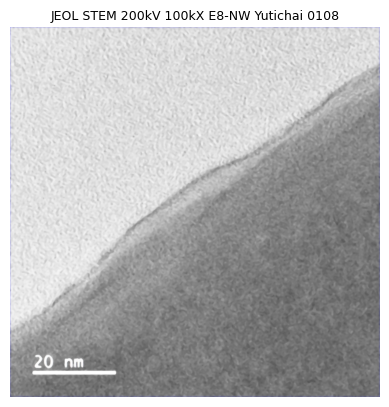

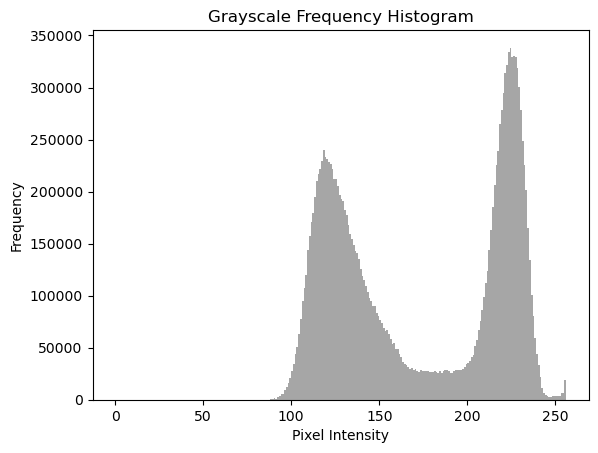

Pixel  90  , Intensity:  1229
Pixel  118  , Intensity:  239578
Pixel  154  , Intensity:  67123
Pixel  158  , Intensity:  54080
Pixel  160  , Intensity:  48776
Pixel  168  , Intensity:  30167
Pixel  170  , Intensity:  29198
Pixel  173  , Intensity:  28643
Pixel  175  , Intensity:  27971
Pixel  177  , Intensity:  27585
Pixel  181  , Intensity:  27489
Pixel  184  , Intensity:  27432
Pixel  188  , Intensity:  28605
Pixel  193  , Intensity:  28852
Pixel  195  , Intensity:  28677
Pixel  224  , Intensity:  338249
Pixel  226  , Intensity:  329893
Pixel  250  , Intensity:  3652
Pixel  255  , Intensity:  19186


In [371]:
plot_pixel_frequency_histogram(modified_images, num_of_histogram=9)

### Border Synthesis

In [374]:
# Border Generation Function
def generate_border(image, border_size=5, n_erosions=1, threshold=150, secondary_threshold=0, tertiary_threshold=0, min_area=500):
    # Ensure the input image is color (BGR)
    if len(image.shape) == 2:   # Convert greyscale to BGR
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    elif image.shape[2] == 4:   # Convert RGBA to BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2BGR)

    greyscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   # Convert the image to grayscale

    # Image erosion
    erosion_kernel = np.ones((3, 3), np.uint8)
    eroded_image_greyscale = cv2.erode(greyscale_image, erosion_kernel, iterations=n_erosions)

    # Image dilation
    kernel_size = 2 * border_size + 1   
    dilation_kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated_image_grayscale = cv2.dilate(eroded_image_greyscale, dilation_kernel, iterations=1)

    # Create border mask
    border_mask = ((dilated_image_grayscale >= threshold) & (eroded_image_greyscale < threshold)).astype(np.uint8) * 255

    # Filter small enclosed borders
    contours, _ = cv2.findContours(border_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_mask = np.zeros_like(border_mask)

    for cnt in contours:
        if cv2.contourArea(cnt) >= min_area: 
            cv2.drawContours(filtered_mask, [cnt], -1, 255, thickness=border_size)

    # Apply filtered mask as red border
    border_color = (0, 0, 255) 
    image_with_border = image.copy()
    image_with_border[filtered_mask == 255] = border_color

    # Handle secondary/tertiary thresholds similarly
    for t in [secondary_threshold, tertiary_threshold]:
        if t != 0:
            temp_mask = ((dilated_image_grayscale >= t) & (eroded_image_greyscale < t)).astype(np.uint8) * 255
            contours, _ = cv2.findContours(temp_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for cnt in contours:
                if cv2.contourArea(cnt) >= min_area:
                    cv2.drawContours(filtered_mask, [cnt], -1, 255, thickness=border_size)

            image_with_border[filtered_mask == 255] = border_color

    return image_with_border


In [375]:
# Iterating over all images in the desired directory
print("Processing images in: " + IMAGES_DIR_PATH)

processed_images = []

for modified_image, file_name in zip(modified_images, file_names):
    processed_images.append(generate_border(modified_image, border_size=2, threshold=94, secondary_threshold=32, tertiary_threshold=187, n_erosions=3, min_area=1000))    # Generated the objects borders

    print("Finished processing: "+ file_name + '.' + INPUT_FILE_EXTENSION)

Processing images in: ./TEM_NW/20250709-TEM-Yutichai/E8-NW/
Finished processing: OneView 200kV 5000X E8-NW Yutichai 0138.tif
Finished processing: OneView 200kV 250kX E8-NW Yutichai 0024.tif
Finished processing: OneView 200kV 600X E8-NW Yutichai 0150.tif
Finished processing: OneView 200kV 25kX E8-NW Yutichai 0147.tif
Finished processing: JEOL STEM 200kV 25kX E8-NW Yutichai 0114.tif
Finished processing: OneView 200kV 100kX E8-NW Yutichai 0067.tif
Finished processing: OneView 200kV 25kX E8-NW Yutichai 0072.tif
Finished processing: OneView 200kV 800kX E8-NW Yutichai 0022.tif
Finished processing: OneView 200kV 500kX E8-NW Yutichai 0037.tif
Finished processing: JEOL STEM 200kV 100kX E8-NW Yutichai 0117.tif
Finished processing: OneView 200kV 250kX E8-NW Yutichai 0125.tif
Finished processing: OneView 200kV 800kX E8-NW Yutichai 0023.tif
Finished processing: JEOL STEM 200kV 50kX E8-NW Yutichai 0106.tif
Finished processing: OneView 200kV 25kX E8-NW Yutichai 0149.tif
Finished processing: JEOL STEM

Displaying images in: ./TEM_NW/20250709-TEM-Yutichai/E8-NW/


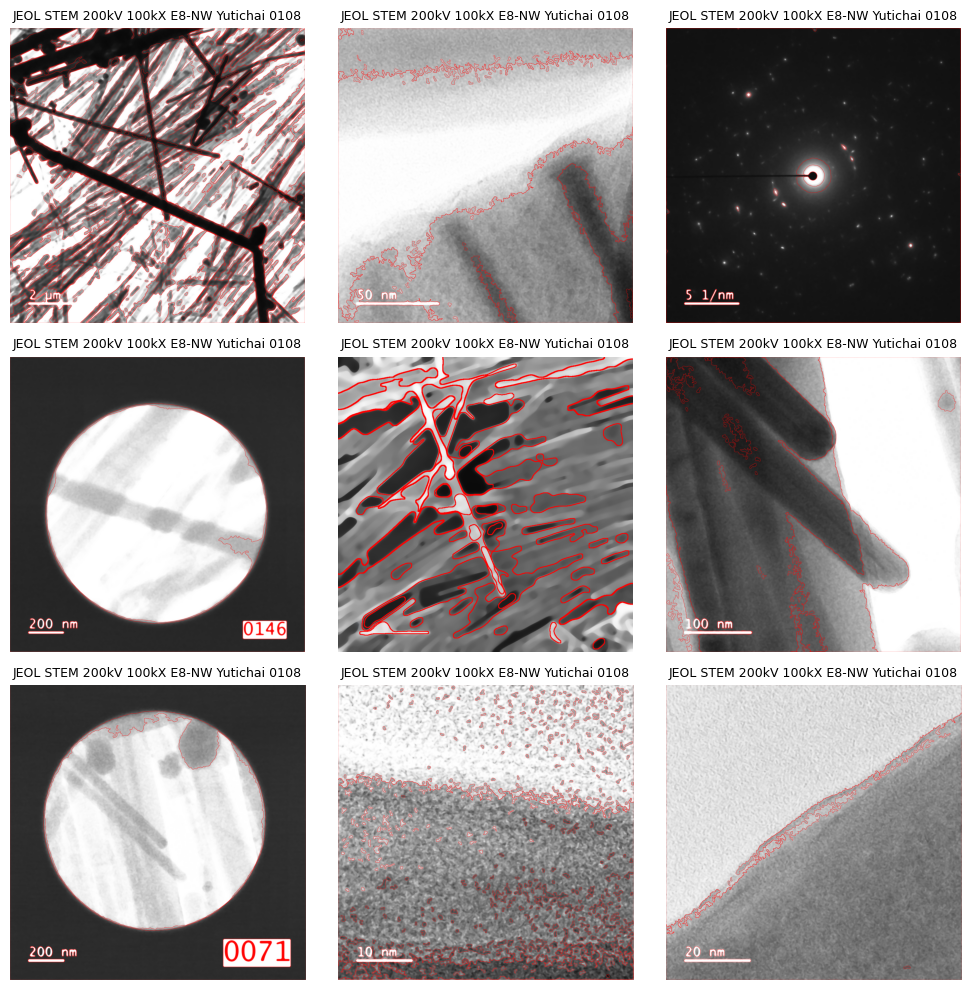

In [376]:
display_images(processed_images)

In [377]:
for processed_image, file_name in zip(processed_images, file_names):
    cv2.imwrite(OUTPUT_DIR_PATH + file_name + '.' + OUTPUT_FILE_EXTENSION, processed_image)   # Save the processed image
    print("Successfully saved " + file_name + '.' + OUTPUT_DIR_PATH)

Successfully saved OneView 200kV 5000X E8-NW Yutichai 0138../outputs/border_generation/
Successfully saved OneView 200kV 250kX E8-NW Yutichai 0024../outputs/border_generation/
Successfully saved OneView 200kV 600X E8-NW Yutichai 0150../outputs/border_generation/
Successfully saved OneView 200kV 25kX E8-NW Yutichai 0147../outputs/border_generation/
Successfully saved JEOL STEM 200kV 25kX E8-NW Yutichai 0114../outputs/border_generation/
Successfully saved OneView 200kV 100kX E8-NW Yutichai 0067../outputs/border_generation/
Successfully saved OneView 200kV 25kX E8-NW Yutichai 0072../outputs/border_generation/
Successfully saved OneView 200kV 800kX E8-NW Yutichai 0022../outputs/border_generation/
Successfully saved OneView 200kV 500kX E8-NW Yutichai 0037../outputs/border_generation/
Successfully saved JEOL STEM 200kV 100kX E8-NW Yutichai 0117../outputs/border_generation/
Successfully saved OneView 200kV 250kX E8-NW Yutichai 0125../outputs/border_generation/
Successfully saved OneView 200kV

# Test section

The code snippets below are solely used for testing purposes, and it can be ignored.

1433


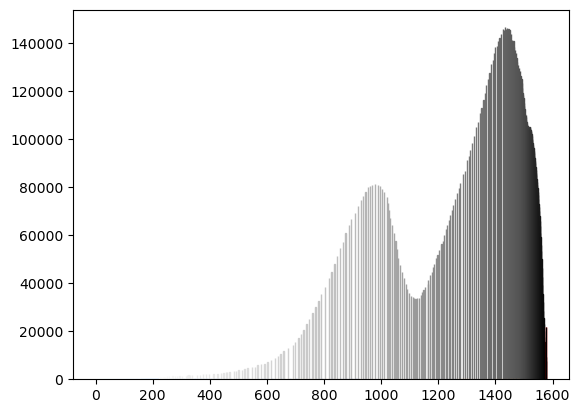

In [378]:
maxC = 0
maxIndex = 0

im = Image.open(IMAGES_DIR_PATH + "OneView 200kV 25kX E8-NW Yutichai 0029.tif")  
w, h = im.size  
colors = im.getcolors(w*h)

def hexencode(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)

for idx, c in enumerate(colors):
     if (c[0] > maxC):
          maxC = c[0]
          maxIndex = idx

     plt.bar(idx, c[0], color=hexencode(c[1]),edgecolor=hexencode(c[1]))

print(maxIndex)
plt.show()

In [379]:
def generate_border_debug(image, border_size=5, n_erosions=1, threshold=150, secondary_threshold=0, tertiary_threshold=0, min_area=500):
    # Ensure the input image is color (BGR)
    if len(image.shape) == 2:   # Convert greyscale to BGR
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    elif image.shape[2] == 4:   # Convert RGBA to BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2BGR)

    greyscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   # Convert the image to grayscale
    
    plt.imshow(greyscale_image, cmap="gray")
    plt.show()

    # Image erosion
    erosion_kernel = np.ones((3, 3), np.uint8)
    eroded_image_greyscale = cv2.erode(greyscale_image, erosion_kernel, iterations=n_erosions)

    plt.imshow(eroded_image_greyscale, cmap="gray")
    plt.show()

    # Image dilation
    kernel_size = 2 * border_size + 1   
    dilation_kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated_image_grayscale = cv2.dilate(eroded_image_greyscale, dilation_kernel, iterations=1)
    
    plt.imshow(dilated_image_grayscale, cmap="gray")
    plt.show()

    # Create border mask
    border_mask = ((dilated_image_grayscale >= threshold) & (eroded_image_greyscale < threshold)).astype(np.uint8) * 255

    # Filter small enclosed borders
    contours, _ = cv2.findContours(border_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_mask = np.zeros_like(border_mask)

    for cnt in contours:
        if cv2.contourArea(cnt) >= min_area: 
            cv2.drawContours(filtered_mask, [cnt], -1, 255, thickness=border_size)

    # Apply filtered mask as red border
    border_color = (0, 0, 255) 
    image_with_border = image.copy()
    image_with_border[filtered_mask == 255] = border_color

    # Handle secondary/tertiary thresholds similarly
    for t in [secondary_threshold, tertiary_threshold]:
        if t != 0:
            temp_mask = ((dilated_image_grayscale >= t) & (eroded_image_greyscale < t)).astype(np.uint8) * 255
            contours, _ = cv2.findContours(temp_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for cnt in contours:
                if cv2.contourArea(cnt) >= min_area:
                    cv2.drawContours(filtered_mask, [cnt], -1, 255, thickness=border_size)

            image_with_border[filtered_mask == 255] = border_color

    # Convert to RGB for matplotlib
    image_with_border_rgb = cv2.cvtColor(image_with_border, cv2.COLOR_BGR2RGB)
    plt.imshow(image_with_border_rgb)
    plt.show()

    return image_with_border


In [380]:
# Temporary put the function declaration here becuz I'm too lazy to scroll up
# Sowwy :3

# Image Properties Modification Function

# Note: The order of processing layers in this function matters

def modify_image(image, alpha=1.5, beta=2.0, guassian_kernel_size=5, diameter=9, sigmaColor=75, sigmaSpace=75, median_blur_kernel_size=9):
    processed_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    processed_image = cv2.GaussianBlur(processed_image, (guassian_kernel_size, guassian_kernel_size), 0)
    processed_image = cv2.bilateralFilter(processed_image, diameter, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)
    processed_image = cv2.medianBlur(processed_image, median_blur_kernel_size)
    processed_image = cv2.bilateralFilter(processed_image, diameter, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)
    processed_image = cv2.medianBlur(processed_image, median_blur_kernel_size)
    processed_image = cv2.medianBlur(processed_image, median_blur_kernel_size)

    return processed_image

In [381]:
# image = cv2.imread(IMAGES_DIR_PATH + "OneView 200kV 5000X E8-NW Yutichai 0129.tif", cv2.IMREAD_COLOR_BGR)
# modified_image = modify_image(image, alpha=2.05, beta=2.5, guassian_kernel_size=11, diameter=12, sigmaColor=75, sigmaSpace=25, median_blur_kernel_size=17)
# processed_image = generate_border_debug(modified_image, threshold=195, n_erosions=3)
# processed_image_2 = generate_border_debug(processed_image, threshold=75, n_erosions=3)

# cv2.imwrite(OUTPUT_DIR_PATH + "sample_output" + '.' + OUTPUT_FILE_EXTENSION, processed_image)
# cv2.imwrite(OUTPUT_DIR_PATH + "sample_output_2" + '.' + OUTPUT_FILE_EXTENSION, processed_image_2)

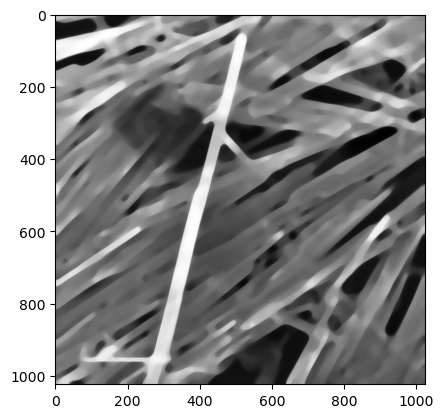

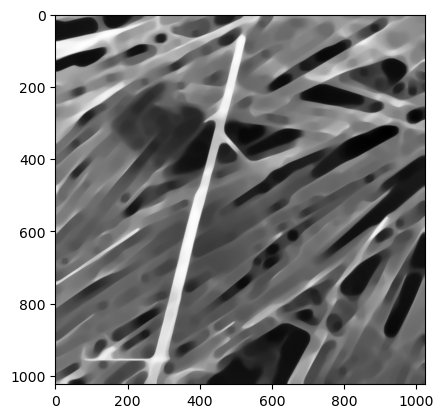

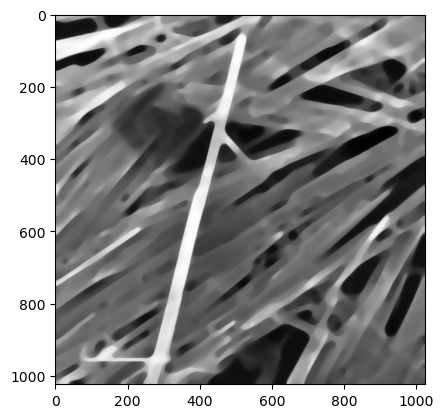

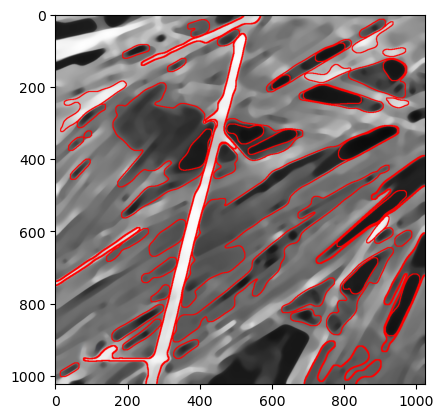

True

In [382]:
image = cv2.imread(IMAGES_DIR_PATH + "JEOL STEM 200kV 25kX E8-NW Yutichai 0110.tif", cv2.IMREAD_COLOR_BGR)
modified_image = modify_image(image, alpha=2.05, beta=1.2, guassian_kernel_size=11, diameter=12, sigmaColor=75, sigmaSpace=25, median_blur_kernel_size=17)
processed_image = generate_border_debug(modified_image, border_size=2, threshold=94, secondary_threshold=32, tertiary_threshold=187, n_erosions=3, min_area=1000)

cv2.imwrite(OUTPUT_DIR_PATH + "sample_output" + '.' + OUTPUT_FILE_EXTENSION, processed_image)

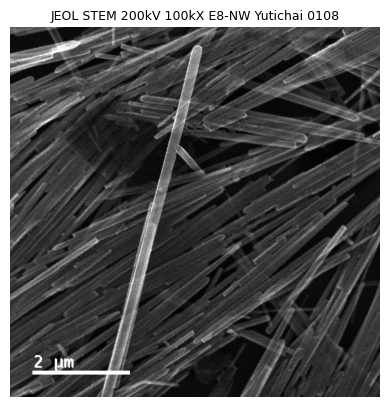

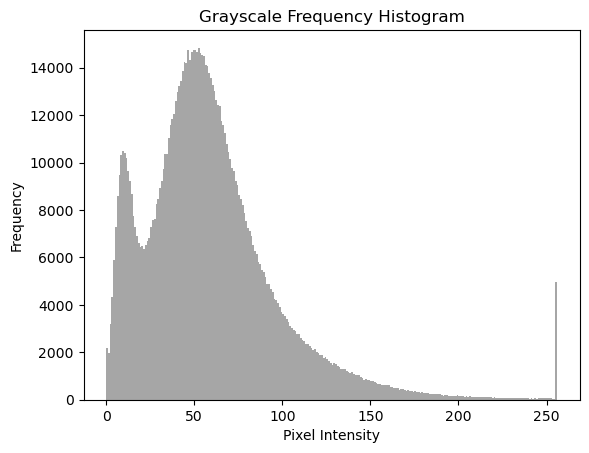

Pixel  0  , Intensity:  2164
Pixel  9  , Intensity:  10485
Pixel  20  , Intensity:  6464
Pixel  33  , Intensity:  10373
Pixel  44  , Intensity:  14222
Pixel  46  , Intensity:  14725
Pixel  49  , Intensity:  14764
Pixel  52  , Intensity:  14842
Pixel  118  , Intensity:  2128
Pixel  122  , Intensity:  1895
Pixel  124  , Intensity:  1790
Pixel  129  , Intensity:  1536
Pixel  135  , Intensity:  1288
Pixel  139  , Intensity:  1177
Pixel  142  , Intensity:  1058
Pixel  147  , Intensity:  883
Pixel  157  , Intensity:  633
Pixel  160  , Intensity:  620
Pixel  164  , Intensity:  502
Pixel  167  , Intensity:  462
Pixel  171  , Intensity:  392
Pixel  175  , Intensity:  353
Pixel  179  , Intensity:  306
Pixel  181  , Intensity:  275
Pixel  185  , Intensity:  241
Pixel  187  , Intensity:  238
Pixel  189  , Intensity:  231
Pixel  192  , Intensity:  180
Pixel  196  , Intensity:  177
Pixel  199  , Intensity:  186
Pixel  201  , Intensity:  155
Pixel  204  , Intensity:  136
Pixel  206  , Intensity:  155

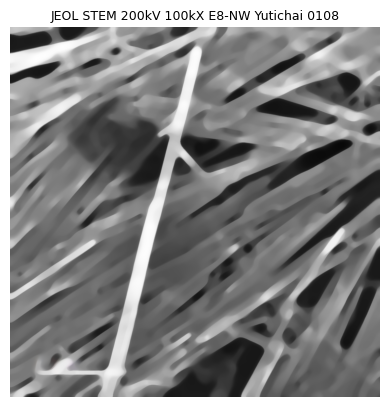

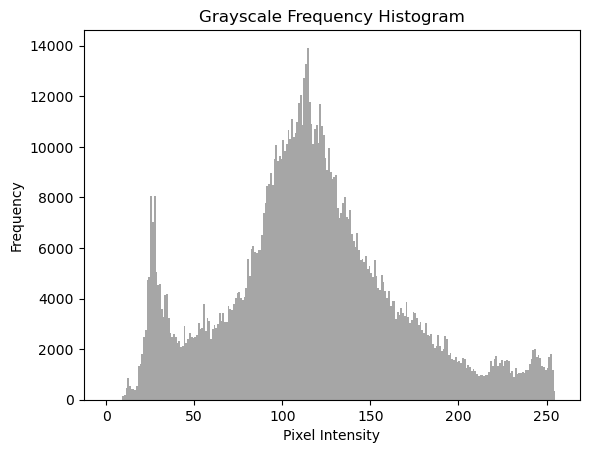

Pixel  12  , Intensity:  844
Pixel  25  , Intensity:  8062
Pixel  27  , Intensity:  8057
Pixel  30  , Intensity:  4560
Pixel  34  , Intensity:  4199
Pixel  38  , Intensity:  2610
Pixel  41  , Intensity:  2320
Pixel  44  , Intensity:  2923
Pixel  47  , Intensity:  2647
Pixel  52  , Intensity:  3017
Pixel  55  , Intensity:  3780
Pixel  57  , Intensity:  3248
Pixel  61  , Intensity:  2947
Pixel  64  , Intensity:  3448
Pixel  66  , Intensity:  3414
Pixel  69  , Intensity:  3690
Pixel  75  , Intensity:  4255
Pixel  80  , Intensity:  5579
Pixel  83  , Intensity:  6061
Pixel  93  , Intensity:  8948
Pixel  96  , Intensity:  10057
Pixel  98  , Intensity:  9639
Pixel  100  , Intensity:  10275
Pixel  103  , Intensity:  10677
Pixel  105  , Intensity:  11111
Pixel  110  , Intensity:  12038
Pixel  114  , Intensity:  13917
Pixel  119  , Intensity:  10852
Pixel  121  , Intensity:  11689
Pixel  126  , Intensity:  9958
Pixel  130  , Intensity:  8873
Pixel  135  , Intensity:  8007
Pixel  138  , Intensity

In [383]:
plot_pixel_frequency_histogram([image])
plot_pixel_frequency_histogram([modified_image])

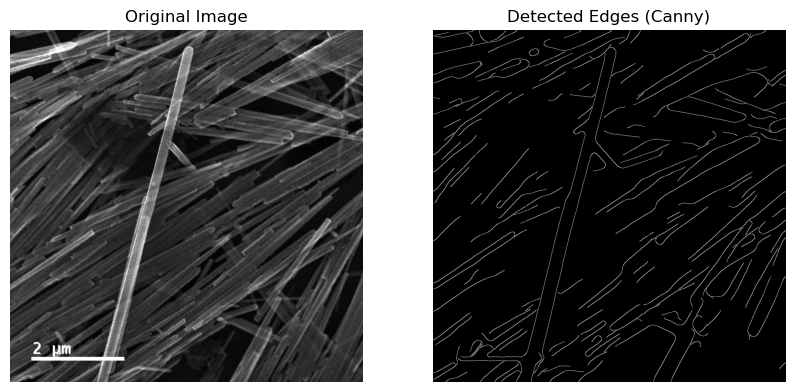

In [384]:
# Using Canny edge detection
edges = cv2.Canny(modified_image, threshold1=50, threshold2=150)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image[:, :, ::-1])
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Detected Edges (Canny)")
plt.axis("off")
plt.show()